In [1]:
# 필요 라이브러리 가져오기

In [2]:
import os
from os.path import join
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [3]:
# DeepLab 모델 준비

In [6]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7ff9aaf259d0>)

In [7]:
# 모델 생성

In [8]:
model = semantic_segmentation()  
model.load_pascalvoc_model(model_file) 

In [9]:
# 이미지 불러오기

In [10]:
img_path = os.getenv('HOME')+'/aiffel/workspace_lms/03_EXPLORATION_RS5/Quest05/images/ksy.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

(480, 480, 3)


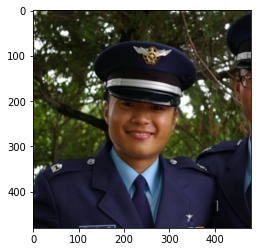

In [11]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
# 모델에 이미지 입력 및 이미지 분할

In [13]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

In [14]:
# 분할 이미지 출력

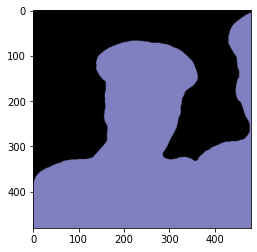

In [15]:
plt.imshow(output)
plt.show()

In [18]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [19]:
segvalues 

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [20]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [21]:
# 컬러맵(영역별 색상값) 확인

In [22]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
# Person의 색상값(컬러맵 15) 확인

In [25]:
colormap[15]

array([192, 128, 128])

In [26]:
# 색상순서 변경

In [27]:
seg_color = (128,128,192)

In [28]:
# seg_color로만 이루어진 마스크 만들기

(480, 480)


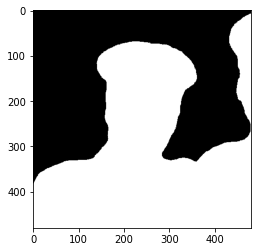

In [29]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

In [30]:
# 원래 이미지와 겹쳐 보기

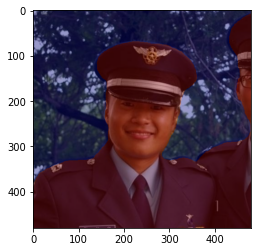

In [31]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
# 배경 흐리게 하기

In [34]:
# 이미지 전체 흐리게(blur) 만들기

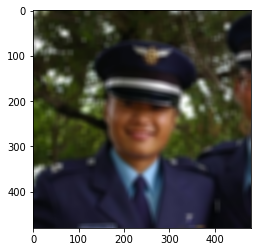

In [35]:
# (13,13)은 blurring kernel size를 뜻합니다
img_orig_blur = cv2.blur(img_orig, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
# 세그멘테이션 마스크를 이용해 흐려진 이미지에서 배경만 추출하기

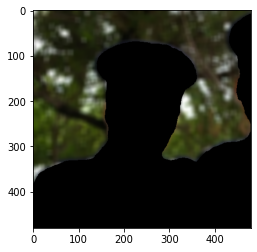

In [37]:
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 이미지 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용해 배경만 있는 이미지 추출
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
# 흐린 배경과 원본 이미지 합성하기

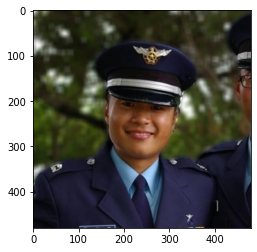

In [39]:
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값 가져옴
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

# 이미지 색상 채널 변경(BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
# 인물사진에서 발생한 문제점 찾기

In [41]:
# 상기 이미지의 경우 왼쪽 귓가의 배경부분이 신체의 일부로 들어옴

In [42]:
# 문제점을 개선할 수 있는 솔루션 제시해보기

In [ ]:
# 우선 인물 모드 사진에서 segmentation이 잘못될 수 있는 여러 이유가 있을 수 있는데,
# 배경이 복잡하거나, 밝기가 너무 밝거나 혹은 어둡거나, 투명 또는 반사,
# 그리고 모델 훈련 데이터가 부족한 경우라 할 수 있겠습니다.
# 본 이미지에서는 투명한 부분이 segmentation이 잘 안 된 경우로 볼 수 있으며,
# 이를 해결하기 위해서는 아래의 방법들이 solution이 될 수 있을 것입니다.

# 첫째, 훈련 데이터의 양을 늘리는 방법입니다. 사진의 조명, 크기 등
# 여러 조건들을 변형한 훈련 데이터를 증강합니다.
# 이를 통해 모델이 다양한 조건에 대해 일반화하도록 할 수 있습니다.

# 둘째, 다양한 배경을 학습시킵니다.
# 상기의 solution과 비슷한 맥락으로, 배경이 다양한 이미지를 더 많이 train data에
# 포함시킨다면, 모델이 person을 더 정확하게 분리하는 데 도움이 될 것입니다.